<div style="text-align: center;">
    <img src="img/logo.png" width="400" alt="logo_uba">
</div>

**Alumnos:** <br />
Pablo Martin Gomez Verdini - gomezpablo86@gmail.com <br />
Diego Paciotti Iacchelli - diegopaciotti@gmail.com  <br />
Joaquin Gonzalez - joagonzalez@gmail.com <br />

**Repositorio Github**<br />
https://github.com/FIUBA-CEIA-18Co2024/IIA-TP2 <br />


In [ ]:
!pip install scikit-learn
!pip install pandas

In [35]:
# Setup
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Carga del dataset
housing = fetch_california_housing()

print(f'Data shape: {housing.data.shape}\nTarget shape: {housing.target.shape}')
print(f'Features: {housing.feature_names}')

Data shape: (20640, 8)
Target shape: (20640,)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [36]:
# Se crea el dataframe con los features
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

# Se agrega la columna target al dataframe 
df['Target'] = housing.target

# Cálculo de la matriz de correlación
correlation_matrix = df.corr()

# Matriz de correlación
print('Matriz de correlación (Full)')
print(correlation_matrix)
print('\n')

# Correlación feature-feature
print('Correlación entre features:')
print(correlation_matrix.loc[housing.feature_names, housing.feature_names])
print('\n')

# Correlación feature-target
print('Correlación entre features y el target:')
correlation_matrix_features_target = correlation_matrix['Target'].loc[housing.feature_names]
correlation_matrix_features_target.name = 'Target'
print(pd.DataFrame(correlation_matrix_features_target))
print('\n')

Matriz de correlación (Full)
              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
Target      0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude    Target  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0

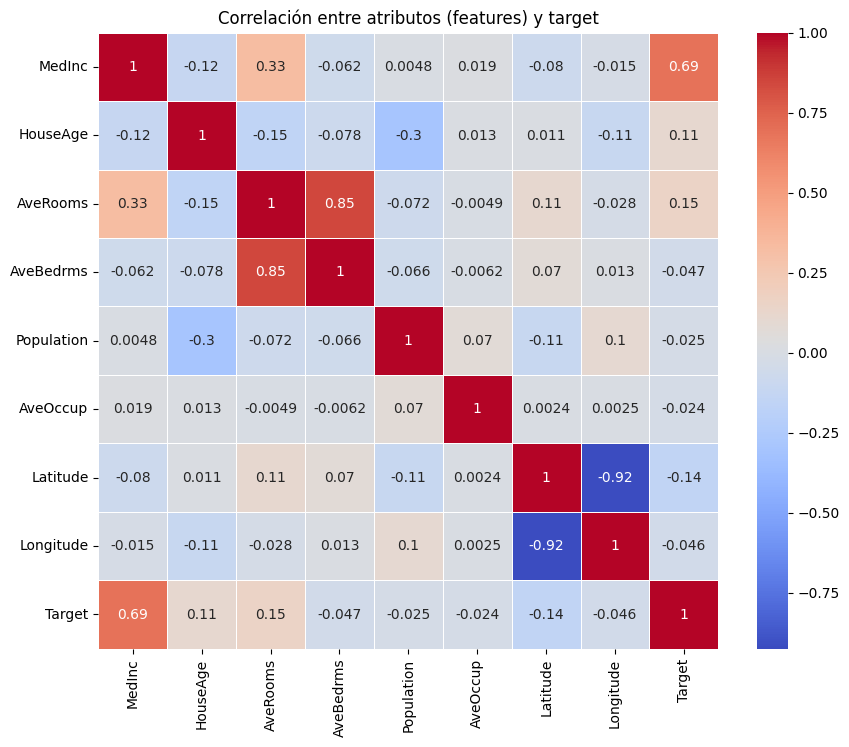

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.title('Correlación entre atributos (features) y target')
plt.show()

### Analisis de los resultados obtenidos

El ingreso medio (MedInc) tiene la mayor correlación positiva con el target (Mediana del valor de las casas) con un valor de 0,69. Esto indica que a medida que el ingreso aumenta, también lo hará el valor de las casas, lo cual es intuitivo dado que las zonas con mayores ingresos suelen tener las viviendas de mayor precio.

En menor medida, el promedio de habitaciones (AveRooms) y la antigüedad de la casa (HouseAge), también tienen una correlación positiva con el atributo target. Esto sugiere que si bien hay influencia de estos features en el precio, lo hacen débilmente. 

La latitud (Latitud)también posee una correlación negativa débil con el precio de las casas. Esto podría indicar que las viviendas ubicadas más al norte tienden a tener un previo más bajo.

El resto de los features presentan una correlación muy débil con el valor de las casas, mostrando una influencia limitada sobre esta.

Con respecto a la correlación entre features, el promedio de habitaciones (AveRooms) y el promedio de dormitorios (AveBedrms) poseen un valor muy elevado (0,85), lo cual es lógico dado que viviendas con más habitaciones suelen tener más dormitorios. 

La correlación elevada pero negativa entre longitud y latitud puede atribuirse a la forma que tiene el estado de California. Al observarse en un mapa, puede notarse que al disminuir la latitud (Movimiento hacia el Sur) la longitud aumentará (Movimiento hacia el Este).

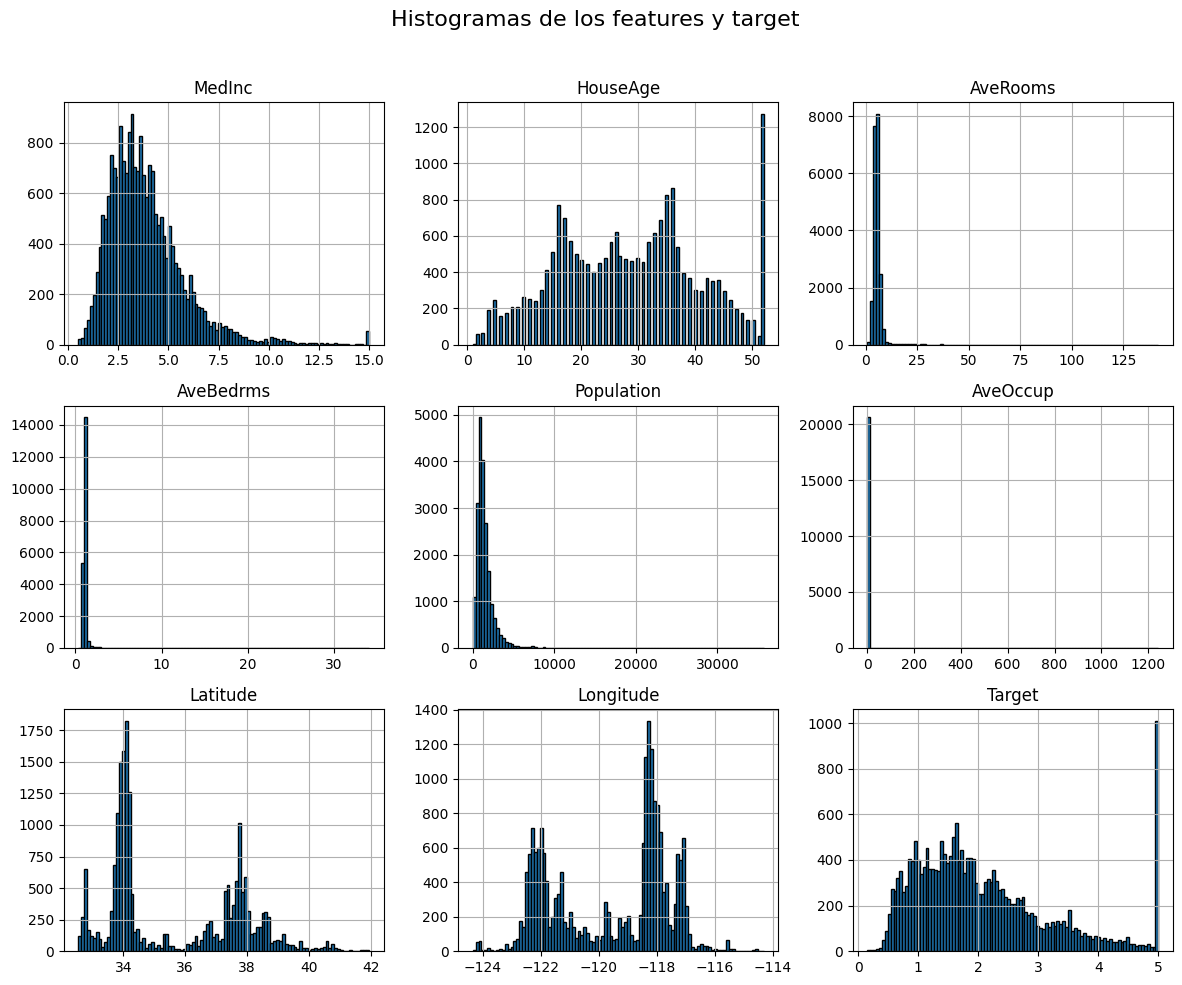

In [39]:
# Plot de los histogramas de cada feature y target
df.hist(bins=100, figsize=(12, 10), edgecolor='black')

# Mostrar histogramas generados
plt.suptitle('Histogramas de los features y target', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Analisis de los resultados obtenidos

- MedInc (Ingreso medio en el bloque):

Este feature muestra una distribución sesgada a la derecha (sesgo positivo). La mayoría de los valores se concentran aproximadamente entre 0 y 6, pero hay algunas áreas de mayor ingreso que extienden la cola hacia la derecha. No es una distribución gaussiana, ya que está muy sesgada.

- HouseAge (Antigüedad mediana de las casas en el bloque):

La distribución es más o menos uniforme, excepto por el pico en la edad máxima (alrededor de 50 años), lo que probablemente refleja áreas con viviendas más antiguas.

- AveRooms (Promedio de habitaciones):

La distribución está fuertemente sesgada hacia la derecha (sesgo positivo). La mayoría de las casas tienen menos de 10 habitaciones, pero algunos pocos valores atípicos tienen significativamente más, extendiendo la cola hacia la derecha. No es una distribución gaussiana.

- AveBedrms (Promedio de dormitorios):

Este feature también muestra una distribución sesgada hacia la derecha. La mayoría de los puntos de datos están agrupados cerca de valores más bajos (menos dormitorios), con algunos valores atípicos que se extienden hacia números muy grandes de dormitorios.

- Population (Población en el bloque):

Puede observarse una distribución fuertemente sesgada hacia la derecha. La mayoría de las áreas tienen poblaciones pequeñas, pero hay algunas áreas con poblaciones muy grandes, creando una larga cola hacia la derecha. No sigue una distribución gaussiana.

- AveOccup (Promedio de ocupación por hogar):

Otra distribución fuertemente sesgada hacia la derecha, donde la mayoría de los valores están agrupados alrededor de un número bajo, y hay muy pocos hogares con tasas de ocupación extremadamente altas. No es gaussiana.

- Latitude (Latitud):

Los valores de latitud parecen estar agrupados en varios grupos distintos, lo que probablemente refleja diferentes regiones geográficas de California. Esta distribución parece bimodal asimétrica, pero no es gaussiana.

- Longitude (Longitud):

Al igual que la latitud, la longitud muestra múltiples picos, lo que sugiere varios grupos geográficos, pero la distribución está más dispersa que la latitud aunque podría también considerarse una bimodal asimétrica. No sigue una distribución gaussiana.

- Target (Mediana del valor de las casas en el  bloque):

La variable target parece tener un sesgo a la derecha pero más leve que en los features anteriores. Hay un pico alrededor de 1.5 y 2.0, con una cola que se extiende hacia valores más altos. En 5 puede visualizarse un pico máximo que se corresponde con el valor límite del dataset. Es decir, todos los bloques cuyas medianas del valor de las casas son iguales o mayores a 500.000 USD se agrupan en ese sector. 
